In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝

/content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

In [4]:
# 데이터셋 로드
breast_data = load_breast_cancer()

In [5]:
breast_data
# 번치객체(딕셔너리처럼 활용)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# X, y 분리
X = breast_data["data"]
y = breast_data["target"]

In [9]:
X.shape, y.shape

((569, 30), (569,))

In [10]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2025, stratify = y)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [12]:
# 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

### 실습!! 이진분류 모델링 수행!!

In [19]:
X_train[0].shape

(30,)

In [21]:
# 1. 신경망 구조설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape = (30, ))) # 데이터 1ea의 모양을 지정
# model.add(Dense(input_dim = 30, units = 16, activation = "relu")) # 비권장

# 중간층(은닉층)
model.add(Dense(32, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))

# 퍼셉트론 : 선형모델 + 활성화함수, 딥러닝의 가장 작은 단위
# MLP : 다층 퍼셉트론, 은닉층이 추가되어있는 딥러닝 모델 구조

# Step -> 초기에 사용되었던 activation -> "오차의 정도"를 전달하지 못 함...
# Sigmoid -> 오차의 정도를 전달하기 시작함 -> "기울기 소실 문제"가 발생...
# relu 계열이 현재 가장 많이 사용됨 -> 기울기 소실 문제를 해결한 활성화 함수!

# 출력층
model.add(Dense(1, activation = "sigmoid"))

In [22]:
# 2. 학습방법 설정
model.compile(
    loss = "binary_crossentropy", # 이항교차 엔트로피
    optimizer = "adam" ,
    metrics = ["accuracy"]
)

# 경사하강법 (최적화 함수)
# GD       : 기본적인 경사하강법(전체 데이터 반영해서 학습)
# SGD      : 확률적 경사하강법(일부 데이터를 학습)
# Momentum : (관성) 이전 기울기 값을 고려해서 학습
# NAG      : (관성) 이후 기울기 값을 고려해서 학습
# AdaGrad  : 학습률을 직접 조정, 방향성을 고려하는게 뛰어남
# Adam     : AdaGrad + Momentum (보폭의 크기와 방향을 모두 고려, 현재로써 가장 많이 사용되는 최적화 함수)

In [23]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4606 - loss: 17.7115 - val_accuracy: 0.4417 - val_loss: 3.2110
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5033 - loss: 3.1446 - val_accuracy: 0.7917 - val_loss: 1.4362
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7658 - loss: 0.8373 - val_accuracy: 0.8333 - val_loss: 1.3825
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8582 - loss: 0.7398 - val_accuracy: 0.8667 - val_loss: 0.4679
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8759 - loss: 0.4839 - val_accuracy: 0.8583 - val_loss: 0.5305
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8288 - loss: 0.5720 - val_accuracy: 0.8583 - val_loss: 0.8906
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9217 - loss: 0.3448 - val_accuracy: 0.8917 - val_loss: 0.4897
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9309 - loss: 0.3287 - val_accuracy: 0.9000 - val_loss

In [24]:
h.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

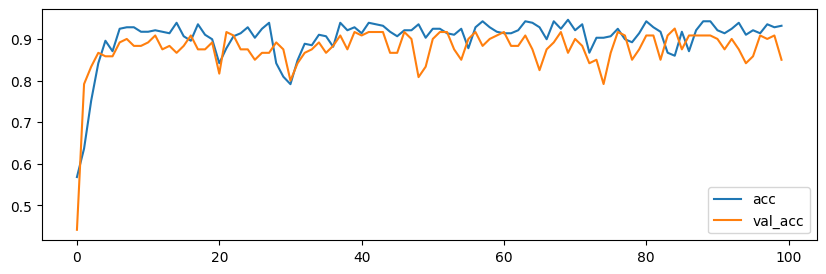

In [25]:
# 4. 시각화
plt.figure(figsize = (10, 3))
plt.plot(h.history["accuracy"], label = "acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")

plt.legend()

plt.show()